# Classification

#### This tutorial will use MNIST dataset that has 70,000 images of handwritten digits.<br/>(Each image is labeled a digit, which has 784=(28x28 pixels) features)

#### First, check scikit-learn version

In [1]:
import sklearn
sklearn.__version__  # Ex. old version = '0.19.1'

'0.21.3'

#### Since we want to use scikit-learn version 0.2 or later, if it is older, we may need to install it something likes below.

#### To know where is "get_data_home" folder

In [2]:
from sklearn.datasets import get_data_home
# print(get_data_home()) # Ex. C:\Users\...\scikit_learn_data

## PART 1: To get and explore MNIST datasets

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#### To get MNIST datasets

In [4]:
from sklearn.datasets import fetch_openml # fetch_openml is used from scikit-learn 0.2 or later.
mnist = fetch_openml('mnist_784', version=1)

#### To know the mnist data type and structure

In [5]:
type(mnist) # Bunch objects are just useful for loading the internal sample datasets at scikit-learn

sklearn.utils.Bunch

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

###### The 'data' key contains an arrary: one rows per instance and one column per feature.<br/>The 'target' contains an array with labels

In [7]:
print("data =\n {}, \n\n shape = {}".format(mnist['data'], mnist['data'].shape))

data =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], 

 shape = (70000, 784)


In [8]:
print("target = {}, \nshape = {}".format(mnist['target'], mnist['target'].shape))

target = ['5' '0' '4' ... '4' '5' '6'], 
shape = (70000,)


In [9]:
# print("feature_names = {}".format(mnist['feature_names'])) # outout= ['pixel1',...'pixel784']
# print("DESCR = {}".format(mnist['DESCR']))  # To describe the dataset
# print("details = {}".format(mnist['details']))
# print("categories = {}".format(mnist['categories']))
# print("url = {}".format(mnist['url']))  # url = https://www.openml.org/d/554

##### Each image is labeled a digit, which has 784=(28x28 pixels) features.<br/> And each feature represents pixel's intensity (from 0 (white) to 255 (black)).  NOTE: MNIST datasets has NOT yet sorted by target. 

#### We will try to show 1 image as an example, as below.

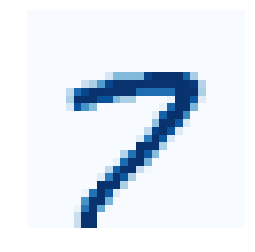

In [10]:
def plot_a_digit(a_digit_data):
    a_digit_img = a_digit_data.reshape(28, 28) # reshape 784 --> 28x28
    plt.imshow(a_digit_img, cmap="Blues", interpolation='nearest')
    plt.axis('off')

_index = 123  # Just one example to choose an arbitrary digit of X
a_digit_data = mnist['data'][_index] 
plot_a_digit(a_digit_data=a_digit_data)    

##### The above image looks like 7. Let's check its target value

In [11]:
print('target at index={} is {}'.format(_index, mnist['target'][_index]))

target at index=123 is 7


## PART 2: Binary Classifier

#### Split in training set and test set

In [12]:
X, y = mnist['data'], mnist['target']

In [13]:
# Note: type(y[0]) is str --> so we need to change it to integer
y = y.astype(np.uint8)

In [14]:
# Training set: 60000 images, test set: 10000 images
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_train_7 = (y_train == 7)  # True for all 7 or False otherewise
y_test_7 = (y_test == 7)

In [16]:
# Ex.
print(y_train_7[0], y_train_7[123], y_train_7[1234])

False True False


#### Using SGD (Stochastic Gradient Descent) classifer

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, 
            y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# predict number 7
_index = 123  # refer to above code. write here for clear
a_digit_data = mnist['data'][_index] # this number is 7 as we demonstrate above.
sgd_clf.predict([a_digit_data]) # --> True. Meaning that it predicts this number is 7.

array([ True])

### Methods to measure performance: (1) Accuracy score (from cross-validation)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, 
                X_train, 
                y_train_7, 
                cv=5,  # K-fold = 5 
                scoring='accuracy')

array([0.98033333, 0.9825    , 0.97333333, 0.97725   , 0.97633333])

### Methods to measure performance: (2) Confusion matrix

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_prediction = cross_val_predict(
                         sgd_clf, 
                         X_train, 
                         y_train_7, 
                         cv=5)  # K-fold=5, return prediction made on each test fold 

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_train_7,
                 y_pred=y_train_prediction)

array([[53180,   555],
       [  768,  5497]], dtype=int64)

### Define:
> * ### Precision = TP/(TP + FP)
* ### Recall (a.k.a Sensitivity or True Positive Rate) = TP/(TP + FN)
* ### F1 score = 2/(1/Precision + 1/Recall) (it is high when precision as well as recall are high)
  <br>But there is a trade-off between precision and recall.
* ### False Postive Rate = 1 - Specificity = 1 - (TN/(TN+FP))
>

#### Precision, Recall and f1_score

In [22]:
# We can calculate Precision and Recall using sklearn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_train_7,
                            y_train_prediction)  # correct predict digit 7
recall = recall_score(y_train_7,
                      y_train_prediction)  # ability to detect digit 7
print('precision={}, recall={}'.format(precision, recall))

precision=0.9082947785855915, recall=0.877414205905826


In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_7,
         y_train_prediction)

0.8925874807177073

In [24]:
# method="decision_function" is to return a score for each instance.
y_scores = cross_val_predict(sgd_clf, 
                             X_train, 
                             y_train_7, 
                             cv=5,  # K-fold=5,
                             method="decision_function")

In [25]:
# Get precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_7,
                                                        y_scores)

In [26]:
len(y_scores)

60000

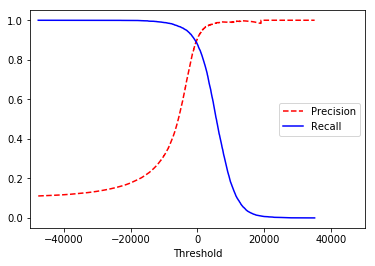

In [27]:
def plot_precision_recalls_vs_thresholds(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], 'r--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.xlim([-50000, 50000])
plot_precision_recalls_vs_thresholds(precision, recalls, thresholds)
plt.show()    

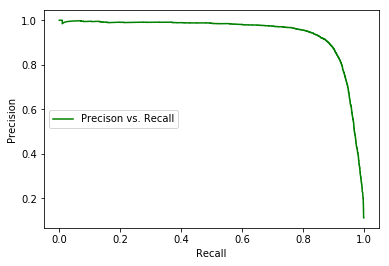

In [28]:
def plot_precision_vs_recalls(precision, recalls):
    plt.plot(recalls[:-1], precision[:-1], 'g-', label='Precison vs. Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='center left')
    # plt.xlim([-50000, 50000])
plot_precision_vs_recalls(precision, recalls)
plt.show()  

#### ROC (Receiving Operating Characteristic) Curve and AUC

In [29]:
from sklearn.metrics import roc_curve

In [30]:
fpr, tpr, thresholds = roc_curve(y_train_7, 
                                 y_scores)

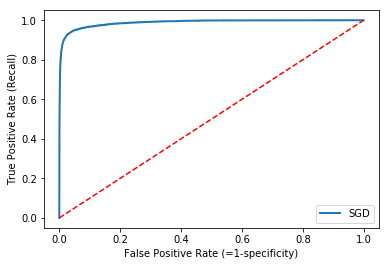

In [31]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2, label="SGD")
    plt.plot([0, 1], [0, 1], 'r--') # plot y=x (1:1 line)
    plt.xlabel('False Positive Rate (=1-specificity)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend(loc='lower right')
plot_roc(fpr, tpr)  
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, y_scores)

0.9880473379196527

#### ROC comparision: SGCClassifier vs. RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(random_state=42)
y_prob_rf = cross_val_predict(rf_cls, 
                              X_train, 
                              y_train_7, 
                              cv=5, 
                              method='predict_proba')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [34]:
y_scores_rf = y_prob_rf[:, 1]  # score = probability of postive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_7, 
                                          y_scores_rf)

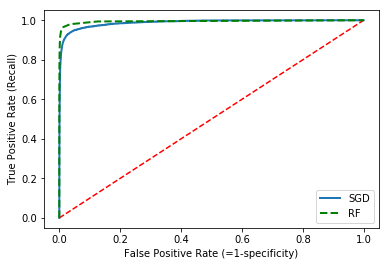

In [35]:
plot_roc(fpr, tpr)  # SGDCclassifier
plt.plot(fpr_rf,  # RandomForestClassifier
         tpr_rf, 
         'g--', 
         linewidth=2, 
         label='RF')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
auc_sgd = roc_auc_score(y_train_7, y_scores)
auc_rf = roc_auc_score(y_train_7, y_scores_rf)
print('auc_sgd={}, auc_rf={}'.format(auc_sgd, auc_rf))

auc_sgd=0.9880473379196527, auc_rf=0.9945192967973913


## PART 3: Multiclass Classifier

> * ### Multiclass classification using multiple binary classifier
  - #### One-versus-One (OvO)
    Ex. N=10 classess: ten digit (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  
    Making every pairs (ex. (0, 1), (0, 2),.., (1,2)....) --> Having Nx(N-1)/2 pairs.  
    Then train a binary classifier for each pairs.  
    If we want to classifiy an image --> Need to run the image through all pairs  
    and see which class win the most duels.  
    - Good for large dataset since each classifier only need to be trained on a part of trainin data.  
    - Good for SVM and Linear classifier because they are strictly binary classifer.
  - #### One-versus-All (OvA) (a.k.s. One-versus-the-rest)  
    Ex. N=10 classess: ten digit (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  
    Making set: (0, all others), (1, all others), ..., (9, all others) --> Having N set.  
    Then train N classifiers.   
    If we want to classifiy an image --> get decision score for each classifer  
    --> select the class whose classifier output has highest score.  
    - Random Forest and naive Bayes are able to handle multiple classes directly.  
    - Note: sklearn detects if input is binary classification for multiple classfication,  
      it will run One-versus-All under the hood.    

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)  # sgd_clf is linear model
sgd_clf.fit(X_train, 
            y_train  # y_train here having multiclass (0, 1, 2, 3,..,9)
                     # sklearn will run One-versus-All under the hood
           )

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

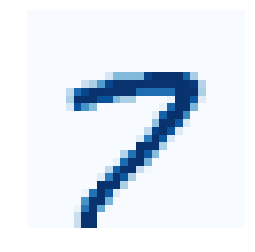

In [38]:
_index = 123  # Just one example to choose an arbitrary digit of X
a_digit_data = mnist['data'][_index]  # a_digit_data is 7
plot_a_digit(a_digit_data=a_digit_data)  

In [39]:
sgd_clf.predict([a_digit_data ])  # It predicts 7 --> correctly

array([7], dtype=uint8)

In [40]:
# access to decision_function() to understand that sklearn have run 10 classication
digit_scores = sgd_clf.decision_function([a_digit_data])
print(digit_scores)  # having 10 scores and highest score is at 7 (in this case means 7 digit)
print('max at index = ', np.argmax(digit_scores))

[[-18129.01527049 -37778.09721109 -16850.44009028  -9597.50980056
  -25638.44551539 -15728.62076615 -44228.72492057   9644.84483261
   -2365.02358162  -2025.73614231]]
max at index =  7


In [41]:
sgd_clf.classes_  # show list of target classes.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
# to get accuracy
cross_val_score(sgd_clf, 
                X_train, 
                y_train, 
                cv=5, 
                scoring='accuracy')

array([0.8849646 , 0.87627062, 0.87341667, 0.86388264, 0.87062354])

#### How to force sklearn use OvO or OvA

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,
            y_train)
predict_digit = ovo_clf.predict([a_digit_data])
print('predict_digit = ', predict_digit)
print('number of running classifier = ', len(ovo_clf.estimators_))
# we see 45 classifiers (= N(N-1)/2 = 10*9/2 = 45)

predict_digit =  [7]
number of running classifier =  45


#### Directly run multiclass classification using RF

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, 
           y_train)
rf_clf.predict([a_digit_data])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([7], dtype=uint8)

In [45]:
# To see the probability of estimation a "a_digit_data" coressponding with each class.
rf_clf.predict_proba([a_digit_data])
# output: array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])
# means that 100% represents at class 7. Actually, 7 is quite easy to recognize.
# if you choose other digit such as 5, it may not get 100% represent 5

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### Error Analysis using confusion matrix

In [46]:
# Example for sgd_clf
y_train_predict = cross_val_predict(sgd_clf, 
                                    X_train, 
                                    y_train, 
                                    cv=5)
confusion_mx = confusion_matrix(y_train, 
                                y_train_predict)

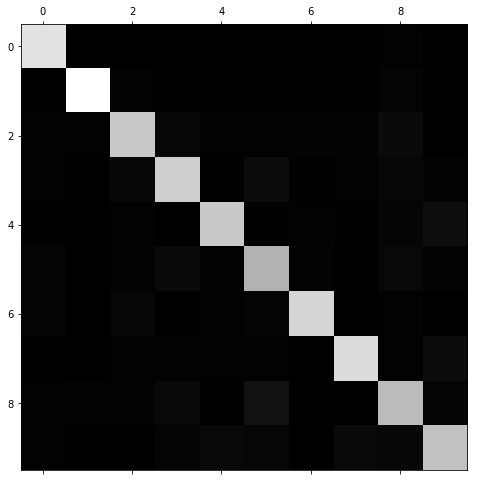

In [64]:
matfig = plt.figure(figsize=(8, 8))
plt.matshow(confusion_mx, 
            cmap=plt.cm.gray,
            fignum=matfig.number)
plt.show()

In [60]:
row_sums = confusion_mx.sum(axis=1,  # axis=0: along column, axis=1: along row
                            keepdims=True)
norm_confusion_mx = confusion_mx/row_sums

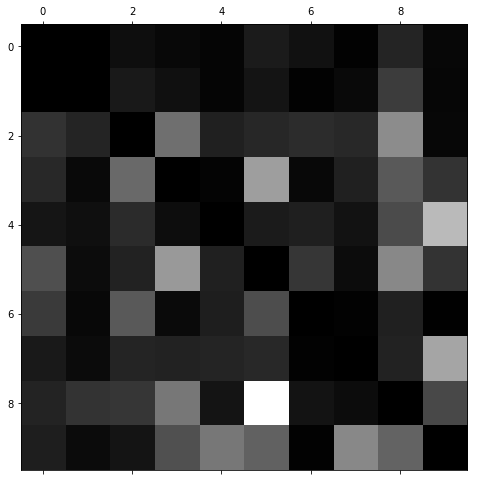

In [67]:
# fill the norm_confusion_mxdiagonal with zeros so we can concentrate on error
matfig = plt.figure(figsize=(8, 8))
np.fill_diagonal(norm_confusion_mx, 0)
plt.matshow(norm_confusion_mx, 
            cmap=plt.cm.gray,
            fignum=matfig.number)
plt.show()
# Remind: The figure below: row is actual classess and column is predicted classess.
# As can be seen very clearly, actuall "8" but miss classified as "5"

## PART 4: Multilabel Classification

In [70]:
# We have consider each instance has been assigned to just 1 class.
# For example: y_train = array([5, 0, 4, ..., 5, 6, 8], dtype=uint8) with len=60000

# In this part, we consider multiple binary lables.
# One example as below.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)  # arrary: True if value>7 else False
y_train_even = (y_train % 2 == 0)  # array: True if value is even else False
y_train_multilable = np.c_[y_train_large, y_train_even]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html

In [74]:
y_train_multilable

array([[False, False],
       [False,  True],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [ True,  True]])

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, 
            y_train_multilable)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
knn_clf.predict([a_digit_data])  # a_digit_data: refer to Part 3
# Since a_digit_data is 7 so it is True that it in y_train_large 
# but it is False because it is NOT even (so NOT in y_train_even)

array([[ True, False]])

In [78]:
import datetime
start_time = datetime.datetime.now()
print('start_time = ', start_time)
y_train_knn_predict = cross_val_predict(knn_clf, 
                                        X_train, 
                                        y_train_multilable, 
                                        cv=3, 
                                        n_jobs=-1)
f1_score(y_train_multilable,
         y_train_knn_predict, 
         average="macro")  # "macro": assume all labels are equally important
                           # "weighted": given a weight for each lable

end_time = datetime.datetime.now()
print('end_time = ', end_time)
print('Time to run = ', end_time-start_time)

In [79]:
start_time

datetime.datetime(2019, 8, 11, 22, 11, 21, 641047)

## PART 5: Multioutput Classification

In [82]:
# For illustration, adding some noise to data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_modified = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_modified = X_test + noise
y_train_modified = X_train
y_test_modified = X_test

In [91]:
test_at_index = 5000
knn_clf.fit(X_train_modified, 
            y_train_modified)
clean_digit = knn_clf.predict([X_test_modified[test_at_index]])

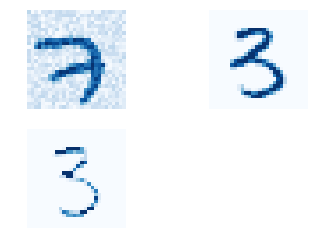

In [92]:
plt.subplot(221);
plot_a_digit(a_digit_data=X_train_modified[test_at_index])
plt.subplot(222);
plot_a_digit(a_digit_data=y_test_modified[test_at_index])
plt.subplot(223)
plot_a_digit(a_digit_data=clean_digit)
plt.show()